In [1]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
        'width': 1920,
        'height': 1080,
        'scroll': True,
})

{'width': 1920, 'height': 1080, 'scroll': True}

# Week 03 (Monday), AST 8581 / PHYS 8581 / CSCI 8581 / STAT 8581: Big Data in Astrophysics

### Michael Coughlin <cough052@umn.edu>, Jie Ding <dingj@umn.edu>


With contributions totally ripped off from Zjelko Ivezic and Mario Juric (UW), Gordon Richards (Drexel), Federica Bianco (U. Del), Maria Suveges (EPFL), Gautham Narayan (UIUC), Michael Steinbach (UMN) and Nico Adams (UMN)


# Where are we headed?

Foundations of Data and Probability -> Statistical frameworks (Frequentist vs Bayesian) -> <b>Estimating underlying distributions</b> -> Analysis of Time series (periodicity) -> Analysis of Time series (variability) -> Analysis of Time series (stochastic processes) -> Gaussian Processes -> Decision Trees / Regression -> Dimensionality Reduction -> Principle Component Analysis -> Clustering -> Density Estimation / Anomaly Detection -> Supervised Learning -> Deep Learning -> Introduction to Databases - SQL -> Introduction to Databases - NoSQL -> Introduction to Multiprocessing -> Introduction to GPUs -> Unit Testing

# <center> Homework # 1</center>

### - Really nice work, and interesting to see the ways folks solved the problems!

* Thank you everyone who stuck to the structure. Gentle reminder to use 01/homework01.ipynb, 02/homework02.ipynb, etc. in your folders for easy grading.
* Please remember to make comments on the data / result when asked for it. It's OK if you don't see much or don't understand (for example, we will pick up the astro stuff as we go!), saying that is fine. - Also, please remember to use proper labels on the axes of your plots... this is good practice! - And if you are plotting magnitudes, remember to flip axes
* I do suggest using Markdown instead of code comments for the prose... easier to see!
* Gentle reminder to list your collaborators and ChatGPT usage as well (apart from general sharing in Slack)

## Recap from last time

* Describing random variables
    * null hypothesis rejection testing
    * outlier rejection with $\sigma$-clipping and robust statistics
* M-estimators and maximum likelihood
    * HW includes using Huber loss as a robust M-estimator
* Goodness of fit


## <center> It's fine if the last two items seem vague - we've got all this week on maximum likelihood! </center>

### <center> Other things we should talk more about? </center>

<img src="figures/nhrt_key.png"> 
Courtesy Federica Bianco

### But there are some natural questions that arise:

* How do you know you specified the right model if you can't rule it out with the observations?
* How do you know you had enough data to estimate the parameters of the model robustly?

### Big Picture: What Are We After?

There are two fundamental types of statistical questions we want to answer:

#### 1. Model Selection

*Given two potential Models, which better describes my data?*

Examples:

- Is there a linear trend in this data?
- Does a linear or quadratic fit describe our data better?
- Is there a periodic signal in this timeseries?
- Does this star have a planet around it? Does this star have two planets around it?

Often one of the two models is a *null hypothesis*, or a baseline model in which the effect you're interested in is not observed.

#### 2. Model Fitting
*Given this Model, what parameters best fit my data?*

Examples:

- What are the slope and intercept of a line of best-fit?
- What are the parameters of the best quadratic fit?
- What is the frequency, amplitude, and phase of a sinusoidal fit?
- What are the orbital parameters of a planet in this radial velocity data?

Simply, how confident are you in your model itself?

#### This is on the surface a straightforward question, but it leads to a deep philosophical split.

### Frequentism

In this view of the Universe, there is some underlying truth.

I want the photon flux F from a given star, then measure it again, then again, and so on, each time I will get a slightly different answer due to the statistical error of my measuring device.

In the limit of a large number of measurements, the frequency of any given value indicates the probability of measuring that value.

For *frequentists*, probabilities are fundamentally related to frequencies of events i.e. **$P(D|H)$**.

This means, for example, that in a strict frequentist view, it is meaningless to talk about the probability of the true flux of the star: the true flux is (by definition) a single fixed value. 

To talk about a frequency distribution for a fixed value or model parameter is nonsense.

<img align="left" src="figures/41114_2018_17_Fig4_HTML.png" width="200px">

### Let's look at an actual example from the literature

Fig 4: These plots illustrate the differences between $\Lambda$CDM and Galileon models (see Sect. 7.3.1), with (**GN: Solid lines**) and without massive neutrinos (**GN: Dashed lines**). The Galileon models have background Friedmann equations that contain a scalar-field energy density contribution that generates late time cosmic acceleration and has an evolution consistent with observations and thus similar to that of a $\Lambda$CDM model.

The Top: CMB temperature power spectra showing the ISW effect at low multipoles. 

Middle: CMB lensing potential spectra. Bottom: linear matter power spectra. The models plotted in dashed lines indicate **their best fit models to Ade et al. (2014c) temperature data, WMAP9 polarization data (Hinshaw et al. 2013), and Planck-2013 CMB lensing (Ade et al. 2014d).** 

https://link.springer.com/article/10.1007/s41114-018-0017-4

## The thing to note here is that there is a model that has been "fit" to some noisy data, but the model is taken as "Truth." 

## There is no uncertainty reported about the model. 

<img src="build/1.png" width="600">

<img src="build/2.png" width="600">

<img src="build/3.png" width="600">

<img src="build/4.png" width="600">

<img src="build/5.png" width="600">

<img src="build/6.png" width="600">

<img src="build/7.png" width="600">

### The Bayesian View

For Bayesians, the concept of probability is extended to cover degrees of certainty about statements. 

Say a Bayesian claims to measure the flux F of a star with some probability P(F): that probability can certainly be estimated from frequencies in the limit of a large number of repeated experiments, but this is not fundamental. 

The probability is a statement of my knowledge of what the measurement result will be. 

For Bayesians, probabilities are fundamentally related to our own knowledge about an event. 

This means, for example, that in a Bayesian view, we can meaningfully talk about the probability that the true flux of a star lies in a given range. 

That probability codifies our knowledge of the value based on prior information and/or available data i.e. **$P(H|D)$**

For more a more fleshed-out discussion of these different definitions and their consequences, you can see Jake VanderPlas' [series of blog posts](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/) on the topic.

The two quantities, $P(H|D)$ and $P(D|H)$ are related to each other by Bayes' rule:

# $$ P(H|D) \propto P(D|H) \cdot P(H) $$

### Wherefore the Controversy?

When we write Bayes' rule this way, we're all of a sudden doing something controversial: can you see where this controversy lies?

Two controversial points:

- We have a probability distribution over model parameters. A frequentist would say this is meaningless!

- The answer depends on the prior $P(H)$. This is the probability of the model without any data: how are we supposed to know that?

Nevertheless, applying Bayes' rule in this manner gives us a means of quantifying our knowledge of the parameters $\theta$ of some hypothesis $H$ given observed data $D$.

## What is the Point?

At first blush, this might all seem needlessly complicated. Why not simply maximize the likelihood and be done with it? Why multiply by a prior at all?

There are a couple good reasons to go through all of this:

### "Purity"

Many advocates of the Bayesian approach argue for it's philosophical purity: you quantify knowledge in terms of a probability, then follow the math to compute the answer.

The fact that you need to specify a prior might be inconvenient, but we can't simply pretend it away.

There are good reasons to think that the Bayesian posterior is just the quantity we wish to compute; in that case we should compute it, however inconvenient.

Perhaps the most vocal 20th century proponent of this view was Jaynes; I'd highly suggest looking at his book, *Probability Theory: The Logic of Science* ([PDF here](http://bayes.wustl.edu/etj/prob/book.pdf)).

### Parameter Uncertainties

Whether frequentist or Bayesian, the maximum likelihood "point estimate" is only a small part of the picture. What we're really interested in scientifically is the *uncertainty* of the estimates. So simply reporting a point estimate is not appropriate.

In frequentist approaches, "error bars" are generally computed from *Confidence Intervals*, which effectively measure $P(\hat\theta\mid\theta)$, rather than $P(\theta\mid D)$.
It takes some mental gymnastics to relate the confidence interval to the quantity we as scientists have in mind when we say "uncertainty".

In the Bayesian approach, we are actually measuring $P(\theta\mid D)$ from the beginning.

For some approachable reading on frequentist vs. Bayesian uncertainties, I'd suggest [The Fallacy of Placing Confidence in Confidence Intervals](http://learnbayes.org/papers/confidenceIntervalsFallacy/), as well as Jake's (rather opinionated) blog post on the topic, [Confidence, Credibility, and why Frequentism and Science do not Mix](http://jakevdp.github.io/blog/2014/06/12/frequentism-and-bayesianism-3-confidence-credibility/).

### Aside - the denominator in Bayes' rule


The denominator in Bayes' rule is the Evidence $P(D)$

# $$ P(H|D) = \frac{P(D|H) \cdot P(H)}{P(D)} $$

Consider that the evidence can be expressed as an integral using the identities we covered above:
$$
P(D) = \int P(D\mid\theta) P(\theta) d\theta
$$

In other words, it is the integral over the likelihood for *all possible values of theta*.

This means we could have called the Fully Marginalized Likelihood (FML) instead of the evidence. 

When your likelihood is a complicated function of many parameters, computing this integral can become extremely costly (a manifestation of the *curse of dimensionality*), which makes the acronym doubly appropriate in any situation where you actually need it.


In general, for **model fitting**, you can ignore the FML as a simple normalization term. In **model selection**, the FML can become important.

## Moving beyond this controversy requires at least one thing:

If you have a "flat" or uniformative prior:

$$ P(H) = 1$$

Then:

$$ P(H|D) \propto P(D|H) $$


But you already know that $P(D|H)$ is just the likelihood.

## The liklihood function then has to play a dual role:
    
Given a fixed set of model parameters ($\theta = \theta_0$) it is evaluating how likely the data you observed is.


But, you can also consider the likelihood to be a function of the model parameters, given fixed data - we did this last week, deriving the MLE estimate for a homoscedastic Gaussian $N(\mu,\sigma)$.

You cast the likelihood as a function you evaluated at a range of model parameter values.

You'll also have to do this on your homework, except now you've got more than 1 parameter.

### Confidence Interval vs. Credible Region

Even with a flat uniform prior, the two approaches **are not the same.**

In the **frequentist paradigm**, the meaning of the *confidence interval* $\mu_0 \pm \sigma_{\mu}$ is 
the interval that would contain the true $\mu$ (from which the data were drawn) in 68% cases
of a large number of imaginary repeated experiments (each with a different N values of $\{x_i\}$). 

The same interval follows from the **Bayesian approach** with uniform priors.
However, the meaning of that so-called *credible region* is *fundamentally different*: it is the interval
that contains the true $\mu$ with a probability of 68%, given the given dataset (our dear one and only 
dataset - there are no imaginary experiments in Bayesian paradigm). 

This credible region is the relevant quantity in the context of scientific measurements. 

### The Essence of the Bayesian Method 

The basic premise of the Bayesian method is that probability statements are not limited to data, 
but can be made for model parameters and models themselves. Inferences are made by producing 
probability density functions (pdfs); most notably, **model parameters are treated as random variables**.

# In class exercise:

Seeing the drawback of an MLE approach, when you fail to incorporate prior information is easy.

Let's do it with some example data:

In [1]:
# some imports we need
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

import scipy.stats as st
import numpy as np
import scipy.integrate as si

## Let's draw a homoscedastic sample of {x_i} from a Gaussian and see what happens with L


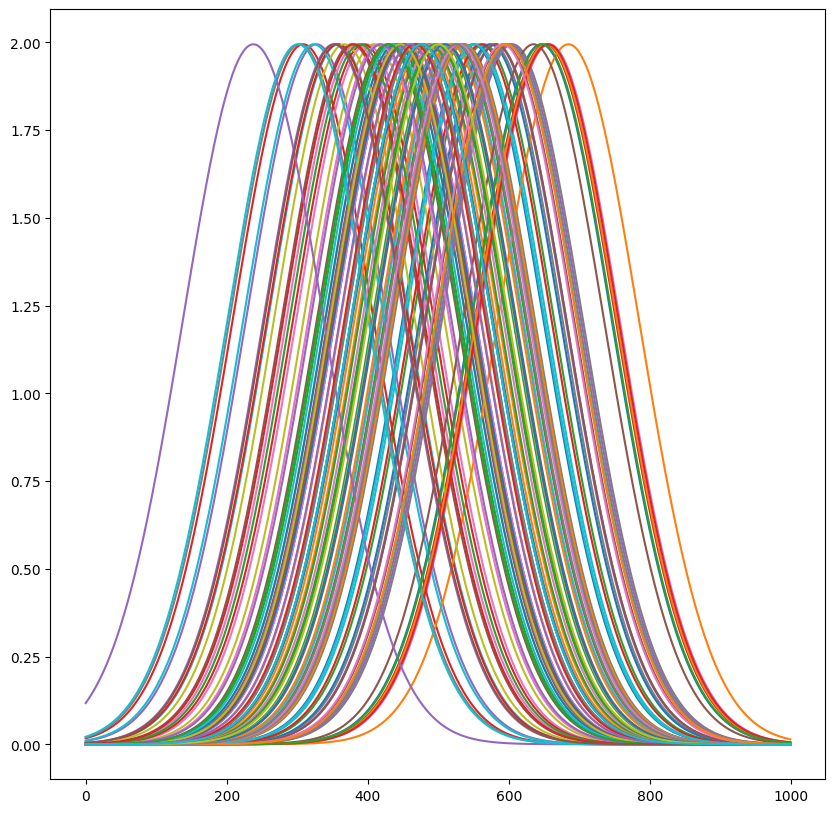

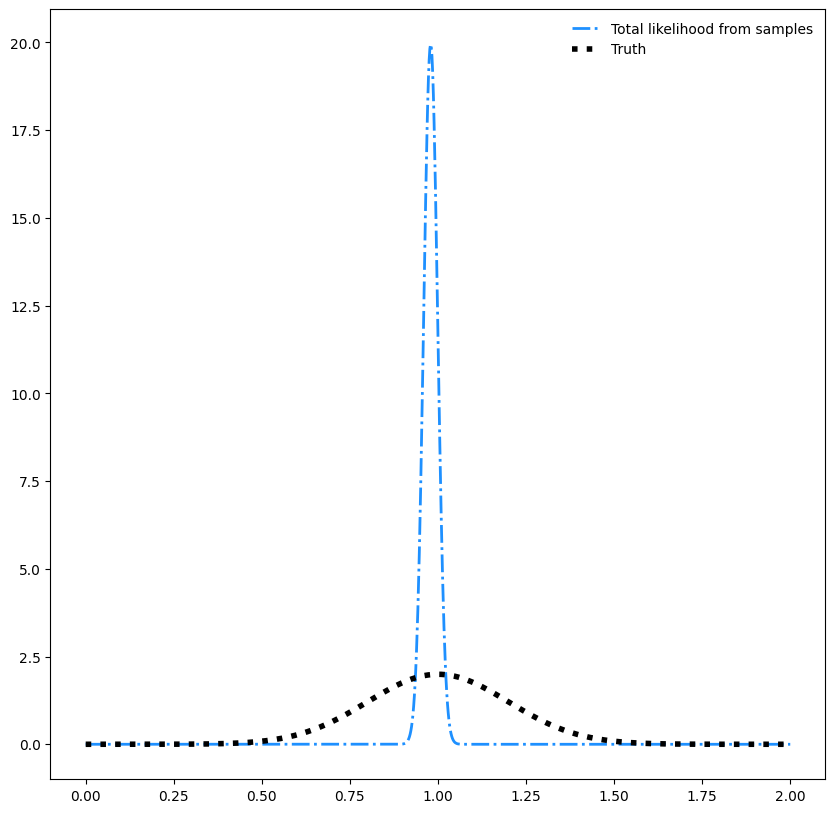

In [28]:
# first generate a sample of N points drawn from N(mu,sigma):
np.random.seed(42)
sampleSize=100
mu = 1.0
sigma = 0.2 
sample = st.norm(mu, sigma).rvs(sampleSize) 

# now compute likelihoods for each point using true mu 
muGrid = np.linspace(0,2,1000)
sigmaGrid = np.ones(1000)
sigmaGrid = sigmaGrid*0.2
likelihood = np.ones(len(muGrid))

# what's the total likelihood and where is the maximum likelihood?
for i in sample:
    # YOUR CODE HERE
    this_L = st.norm(muGrid,sigmaGrid).pdf(i)
    plt.plot(this_L)
    likelihood*=this_L

# renormalize the total area
likelihood /= si.trapz(likelihood, muGrid)
plt.show()
# plot the likelihood
plt.plot(muGrid, likelihood, lw=2, color='DodgerBlue', ls='-.', label='Total likelihood from samples')
             
    
# plot the truth for comparison
# you should be able to change the sample size in the above cell 
# and see the total likelihood get sharper as the sample size increases
# you can even verify that the standard deviation scales as sqrt(N)

truth = st.norm(1, sigma).pdf(muGrid)
plt.plot(muGrid, truth, 'k:', lw=4, label='Truth')
plt.legend(frameon=False)

## Now what happens if I tell you that mu>=0.99?

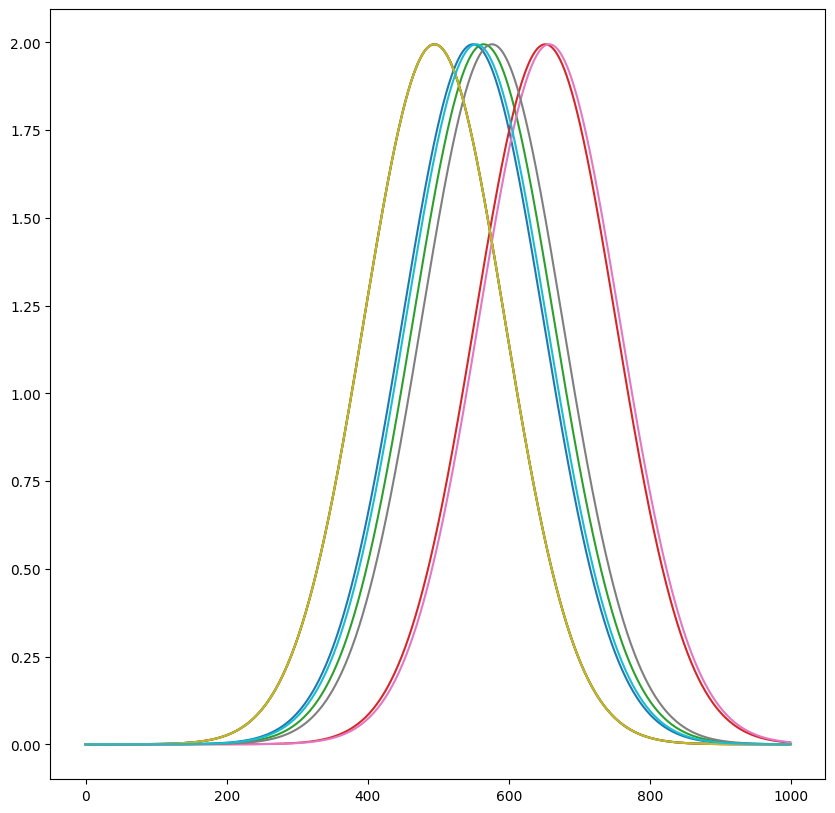

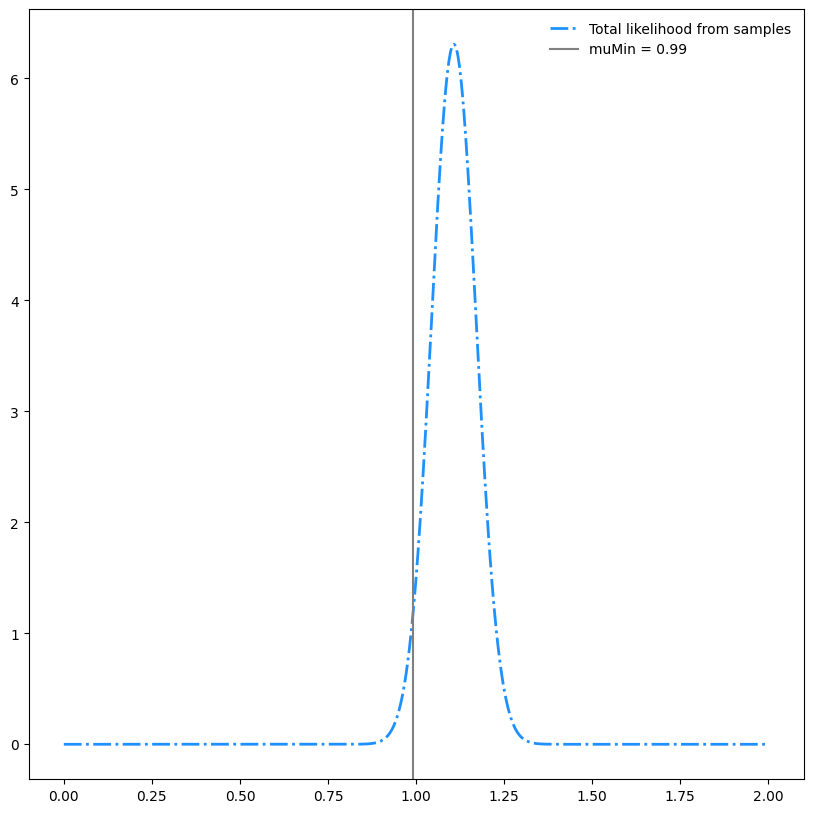

In [32]:
muMin = 0.99

# draw sample as before
np.random.seed(42)
sampleSize=10
mu = 1.0
sigma = 0.2 
sample = st.norm(mu, sigma).rvs(sampleSize)

# lets clip samples to be greater than 0.99
### YOUR CODE HERE
sample = np.clip(sample, a_min=0.99, a_max=sample.max())


likelihood = np.ones(len(muGrid))
# what's the total likelihood and where is the maximum likelihood
for i in sample:
    # YOUR CODE HERE
    this_L = st.norm(muGrid,sigmaGrid).pdf(i)
    plt.plot(this_L)
    likelihood*=this_L

# renormalize the total area
likelihood /= si.trapz(likelihood, muGrid)
plt.show()

# save a copy of this for the next step
likelihood_no_prior = likelihood

plt.plot(muGrid, likelihood, lw=2, color='DodgerBlue', ls='-.', label='Total likelihood from samples')
plt.axvline(muMin, color='grey', label=f'muMin = {muMin:0.2f}')
plt.legend(frameon=False)

## Suppose the prior is Gaussian with mean 0.99 and variance 1. repeat the above experiment to numerically calculate & plot the posterior 


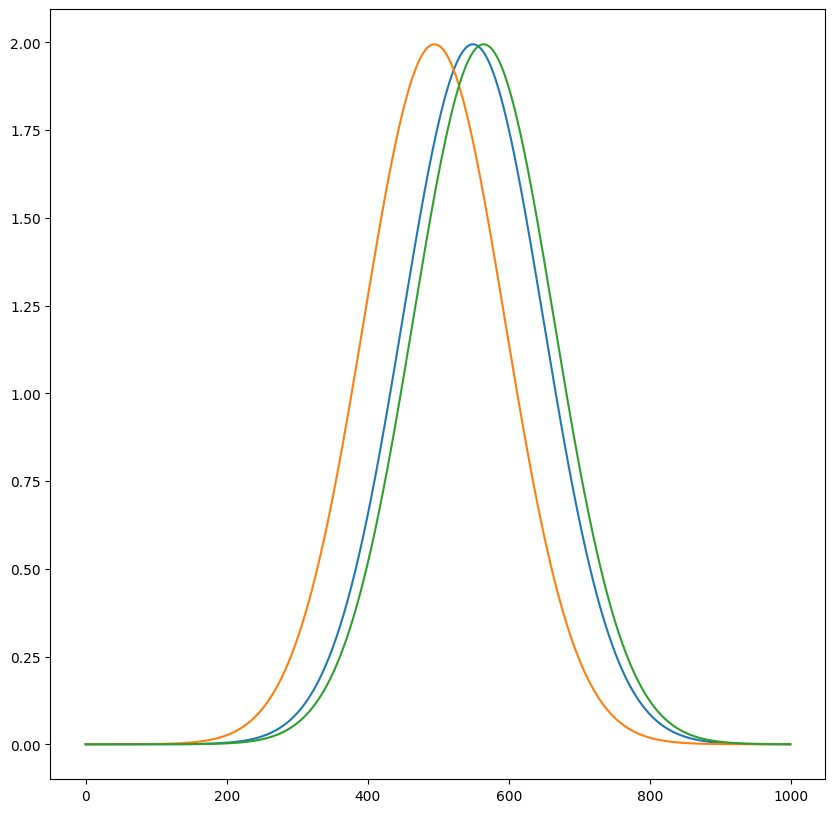

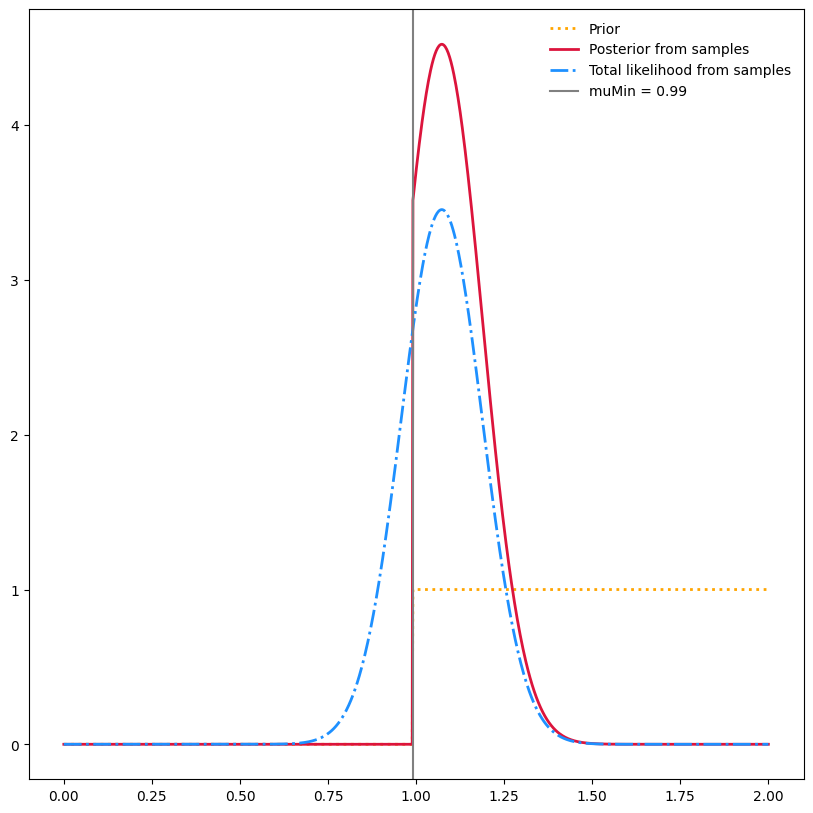

In [35]:
muMin = 0.99

# draw sample as before
np.random.seed(42)
sampleSize=3
mu = 1.0
sigma = 0.2 
sample = st.norm(mu, sigma).rvs(sampleSize)

# lets clip samples to be greater than 0.99
sample = np.clip(sample, a_min=0.99, a_max=sample.max())


likelihood = np.ones(len(muGrid))
posterior  = np.ones(len(muGrid))

# now lets incorporate a prior
prior = np.ones(len(muGrid))
prior[muGrid < muMin] = 0.


# what's the total likelihood and where is the maximum likelihood
for i in sample:
    # YOUR CODE HERE
    this_L = st.norm(muGrid,sigmaGrid).pdf(i)
    plt.plot(this_L)
    likelihood*=this_L 
    posterior *= prior*this_L

    
# renormalize the total area
posterior /= si.trapz(posterior, muGrid)
plt.show()
# renormalize the total area
likelihood /= si.trapz(likelihood, muGrid)

plt.plot(muGrid, prior, lw=2, color='orange', ls=':', label='Prior')
plt.plot(muGrid, posterior, lw=2, color='Crimson', ls='-', label='Posterior from samples')
plt.plot(muGrid, likelihood, lw=2, color='DodgerBlue', ls='-.', label='Total likelihood from samples')

plt.axvline(muMin, color='grey', label=f'muMin = {muMin:0.2f}')
plt.legend(frameon=False)


## Notice that the shape of the likelihood and posterior distributions is now quite different

## with a large number of samples, this difference should be minimized... but sometimes you don't get lucky enough to get a large number of samples and still have to account for some sort of selection effect.

## Here we're seeing how the distributions look different. In the homework for this week, you'll quantify how the two different frameworks can differ *quantitatively*.